In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文显示
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 一、读取数据集
选择了**所有学员**的`学习总时长` 和 `OPENID使用情况` 两个数据集,  
因为这两个数据集都包含了同样含义的 `_id` 字段，可以 join 两个数据集。

In [86]:
f1 = '../../data/周一所获数据/所有学员的学习总时长ms.csv'
f2 = '../../data/周一所获数据/所有学员的OPENID使用情况.csv'

df_duration = pd.read_csv(f1, dtype={'trainingPersonId': 'string', 'totalDuration': 'float64'})
df_openid = pd.read_csv(f2, dtype={'openIdCount': 'int64', 'openIds': 'string'})

In [87]:
# 查看数据
df_duration.shape  # (11330, 3)
df_openid.shape  # (11218, 3)

(11218, 3)

# 二、连接数据集

In [88]:
df = pd.merge(left=df_duration, right=df_openid, left_on='trainingPersonId' ,right_on='_id', how='inner')

# 三、提取特征并调整量纲
### 1.只保留 `totalDuration`, `openIdCount` 两列特征

In [89]:
# 只保留 `ipCount`, `openIdCount` 两列.并保存为 csv 文件
df_features = df[['_id', 'totalDuration', 'openIdCount']]
df_features.to_csv('./所有学员的学习总时长和OPENID使用情况.csv', index=False)

In [90]:
df_features.shape
df_features.head(100)
# df.types

,_id,totalDuration,openIdCount
0,911cd34f10a911ec8871b07b25146e9e,5426731.0,1
1,010385a510a811ec8871b07b25146e9e,1944271.0,1
2,a2e71c603b2411eeb806fa164011f743,7424480.0,1
3,0e9589d4b40b11eebde5fa164011f743,1821062.0,1
4,12320d4810a811ec8871b07b25146e9e,4994822.0,1
...,...,...,...
95,ee12ea2c10ab11ec8871b07b25146e9e,1355564.0,1
96,d13522de10a711ec8871b07b25146e9e,8213185.0,1
97,e8bb015f10a711ec8871b07b25146e9e,21264273.0,1
98,f1736c35294c11efbde5fa164011f743,14696251.0,1


### 2.数据量纲不一致，需要对数据进行归一化处理

In [91]:
df_features['totalDuration'] = df_features['totalDuration'] / 1000 / 60 / 60  # 将 ms 转换为 hours

C:\Users\fjhb\AppData\Local\Temp\ipykernel_22280\3987457371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['totalDuration'] = df_features['totalDuration'] / 1000 / 60 / 60  # 将 ms 转换为 hours


In [92]:
df_features_sorted = df_features.sort_values(by='totalDuration', ascending=False, inplace=False)

# 3. 绘制图表

In [93]:
# 中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

### (1) 按照 `学习时长` 和 `OpenID` 数量绘制散点图

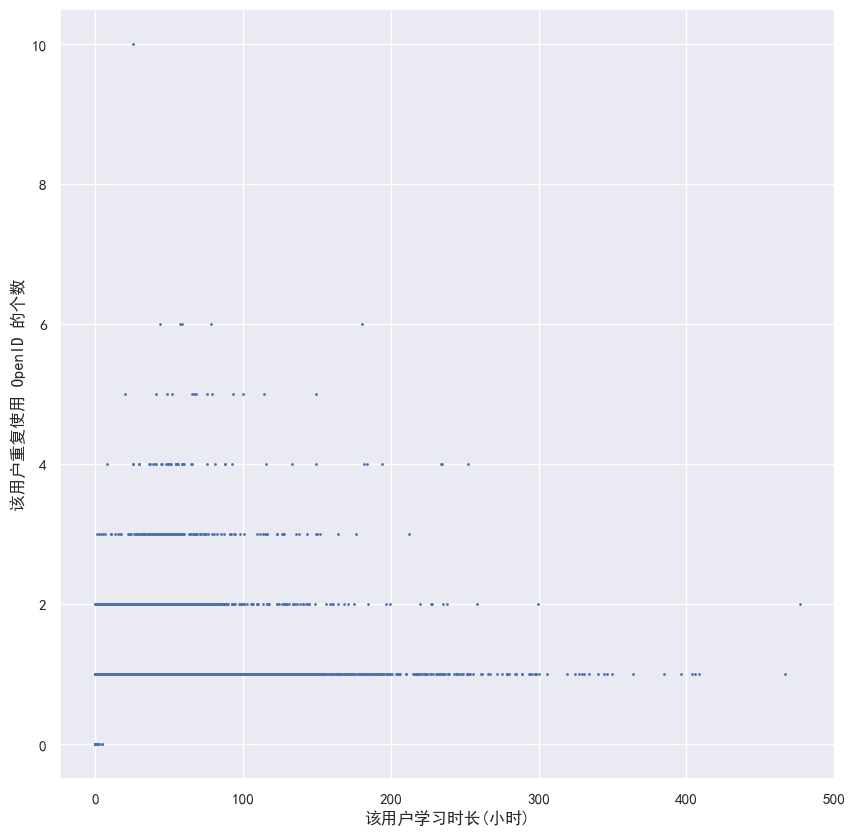

In [95]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

total_rows = df.shape[0]
# total_rows = 50

# x 轴不需要打印每一条 id，只需要打印刻度
ax.scatter(df_features_sorted.head(total_rows).totalDuration,
           df_features_sorted.head(total_rows).openIdCount,
           s=1)



# 设置标题
ax.set_xlabel('该用户学习时长(小时)')
ax.set_ylabel('该用户重复使用 OpenID 的个数')

# 设置 x 轴刻度
# ticks = np.arange(0, total_rows, 1000)
# labels = [f"{df_grouped['latestEndTime'].iloc[t]}" for t in ticks if t < total_rows] # 只打印几个时间戳作为刻度
# plt.xticks(rotation=45,fontsize=8)

# 设置 y 轴刻度精度
# plt.yticks(np.arange(0, 100, 5))

plt.savefig('./imgs/2-1所有学员的学习分钟数和重复使用的 OpenID 个数.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()

### 试试 seaborn 的绘图😋
- `x`：指定 x 轴的数据列。
- `y`：指定 y 轴的数据列。
- `data`：指定数据源，通常是一个 DataFrame。
- `kind`：指定图表类型，可以是 `'scatter'`（散点图）、`'reg'`（回归图）、`'resid'`（残差图）、`'kde'`（核密度估计图）或 `'hex'`（六边形图）。
- `truncate`：布尔值，是否截断回归拟合的边界。
- `xlim`：指定 x 轴的范围。
- `ylim`：指定 y 轴的范围。
- `color`：指定图表的颜色。
- `height`：指定图表的高度（单位为英寸）。

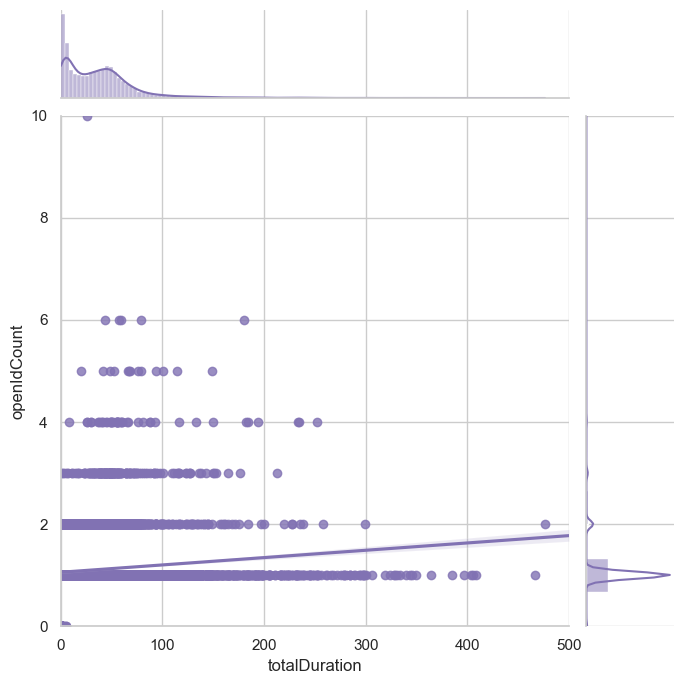

In [108]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.jointplot(x="totalDuration", y="openIdCount", data=df_features_sorted,
                  kind="reg", truncate=False,
                  xlim=(0, 500), ylim=(0, 10),
                  color="m", height=7)
plt.savefig('./imgs/2-2所有学员的学习分钟数和重复使用的 OpenID 个数(seaborn).png', dpi=800, bbox_inches='tight', pad_inches=1)
